# Things to do
    - add humidity column
    - add weekday column
    - one hot encoder cbwd and weekday columns
    - fill NaN with not NaN before
    - outliers
    - add past data columns

In [1]:
import pandas as pd
import numpy as np
from math import exp, isnan
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## Add humidity column

In [3]:
def cal(temp, dewp):
    return 100*(exp((17.625*dewp)/(243.04+dewp))/exp((17.625*temp)/(243.04+temp)))
df['hum'] = [cal(temp, dewp) for temp, dewp in zip(df['TEMP'], df['DEWP'])]

## Add weekday column

In [4]:
weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
tmp = []
for i, j, k in zip(df['day'], df['month'], df['year']):
    date = weekday[datetime.strptime(str('{}/{}/{}'.format(i, j, k)), '%d/%m/%Y').weekday()]
    tmp.append(date)
df['weekday'] = tmp

## One Hot Encoder cbwd column

In [5]:
df = pd.get_dummies(df)

## Fill NaN with not NaN before

In [6]:
df['pm2.5'].isna().sum()

2067

In [7]:
df['pm2.5'].fillna(method='ffill', inplace=True)

In [8]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,cbwd_NW,cbwd_SE,cbwd_cv,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,...,1,0,0,0,0,0,0,1,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,...,1,0,0,0,0,0,0,1,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,...,1,0,0,0,0,0,0,1,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,...,1,0,0,0,0,0,0,1,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,...,1,0,0,0,0,0,0,0,1,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,...,1,0,0,0,0,0,0,0,1,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,...,1,0,0,0,0,0,0,0,1,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,...,1,0,0,0,0,0,0,0,1,0


## Outliers

In [9]:
dic = {}
for day, month, year, hour, pm25 in zip(df['day'], df['month'], df['year'], df['hour'], df['pm2.5']):
    dic[datetime.strptime(str('{}/{}/{} {}:00'.format(day, month, year, hour)), '%d/%m/%Y %H:%M')] = pm25

In [10]:
outlier_df = pd.DataFrame.from_dict(dic, orient='index', columns=['Value'])

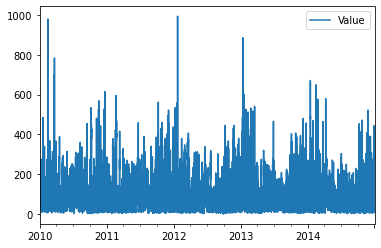

In [11]:
outlier_df.plot()
plt.show()

In [12]:
df = df[df['pm2.5'] <= 600]

## Add past data columns

In [13]:
need_shift = ['pm2.5', 'DEWP', 'TEMP', 'Iws']
for var in need_shift:
    for i in range(1, 5):
        key = var + '_' + str(i)
        df[key] = df[var].shift(periods=i)
df.dropna(inplace=True)

<ipython-input-13-5f52daef90b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[var].shift(periods=i)
<ipython-input-13-5f52daef90b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [14]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'hum', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'pm2.5_1', 'pm2.5_2',
       'pm2.5_3', 'pm2.5_4', 'DEWP_1', 'DEWP_2', 'DEWP_3', 'DEWP_4', 'TEMP_1',
       'TEMP_2', 'TEMP_3', 'TEMP_4', 'Iws_1', 'Iws_2', 'Iws_3', 'Iws_4'],
      dtype='object')

In [15]:
features = list(df.columns[8:])
predicts = list(df.columns[5:8])

In [16]:
X = df[features]
y = df[predicts]

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.05)

## Modeling

In [18]:
random_forest = RandomForestRegressor()

In [19]:
# random_forest.fit(Xtrain, ytrain)
# random_forest.score(Xtrain, ytrain)

# No split data anymore, to train more
random_forest.fit(X, y)
random_forest.score(X, y)

0.996015597177545

In [20]:
def cal():
    data = [0] * 3
    for i in range(len(predict)):
        for j in range(3):
            data[j] += abs(predict[i][j] - ytest[i][j])
    for i in range(3):
        data[i] /= len(predict)
    return (data[0], data[1], data[2])

In [21]:
# predict = random_forest.predict(Xtest)
# print('R^2 score:', r2_score(predict, ytest))
# print('Mean Absolute Error:', mean_absolute_error(predict, ytest))

## Predict for next 6 hours

In [22]:
for i in range(6):
    tail = pd.concat([df.tail(1)], ignore_index=True)
    tail.loc[:, ['day', 'month', 'year', 'hour']] = [1, 1, 2015, i]
    df = pd.concat([df, tail], ignore_index=True)
    df.loc[len(df) - 1:, predicts] = random_forest.predict(tail[features])
    for var in need_shift:
        for i in range(1, 6):
            key = var + '_' + str(i)
            df[key] = df[var].shift(periods=i)

In [23]:
df.tail(6)[['day', 'month', 'year', 'hour'] + predicts]

,day,month,year,hour,pm2.5,DEWP,TEMP
43761,1,1,2015,0,11.17,-21.08,-3.25
43762,1,1,2015,1,12.97,-21.20,-3.66
43763,1,1,2015,2,10.93,-21.14,-3.67
43764,1,1,2015,3,14.22,-21.19,-3.57
43765,1,1,2015,4,11.73,-21.27,-3.88
43766,1,1,2015,5,14.76,-21.15,-3.58


In [24]:
df.tail(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,...,TEMP_3,TEMP_4,Iws_1,Iws_2,Iws_3,Iws_4,pm2.5_5,DEWP_5,TEMP_5,Iws_5
43757,43821,2014,12,31,20,10.00,-22.00,-3.00,1034.0,237.78,...,-1.00,0.00,231.97,226.16,221.24,214.09,11.00,-26.00,1.00,205.15
43758,43822,2014,12,31,21,10.00,-22.00,-3.00,1034.0,242.70,...,-2.00,-1.00,237.78,231.97,226.16,221.24,8.00,-23.00,0.00,214.09
43759,43823,2014,12,31,22,8.00,-22.00,-4.00,1034.0,246.72,...,-2.00,-2.00,242.70,237.78,231.97,226.16,9.00,-22.00,-1.00,221.24
43760,43824,2014,12,31,23,12.00,-21.00,-3.00,1034.0,249.85,...,-3.00,-2.00,246.72,242.70,237.78,231.97,10.00,-22.00,-2.00,226.16
43761,43824,2015,1,1,0,11.17,-21.08,-3.25,1034.0,249.85,...,-3.00,-3.00,249.85,246.72,242.70,237.78,8.00,-23.00,-2.00,231.97
43762,43824,2015,1,1,1,12.97,-21.20,-3.66,1034.0,249.85,...,-4.00,-3.00,249.85,249.85,246.72,242.70,10.00,-22.00,-3.00,237.78
43763,43824,2015,1,1,2,10.93,-21.14,-3.67,1034.0,249.85,...,-3.00,-4.00,249.85,249.85,249.85,246.72,10.00,-22.00,-3.00,242.70
43764,43824,2015,1,1,3,14.22,-21.19,-3.57,1034.0,249.85,...,-3.25,-3.00,249.85,249.85,249.85,249.85,8.00,-22.00,-4.00,246.72
43765,43824,2015,1,1,4,11.73,-21.27,-3.88,1034.0,249.85,...,-3.66,-3.25,249.85,249.85,249.85,249.85,12.00,-21.00,-3.00,249.85
43766,43824,2015,1,1,5,14.76,-21.15,-3.58,1034.0,249.85,...,-3.67,-3.66,249.85,249.85,249.85,249.85,11.17,-21.08,-3.25,249.85


- season
- trend
- statistical models for time serries
- how data transform by times (up or down, low or high)
- past data for weekdays or for pm2.5 last year
- k fold cross validation for time series